In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ All packages are working!")


In [ ]:
!pip install jupyter pandas numpy matplotlib seaborn


In [4]:
#  Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(" All packages are working!")

 All packages are working!


In [6]:
import os

# Replace this path with your actual folder
os.chdir("C:/Users/HP/OneDrive/Desktop/Intro to big data assignment/uber-fares-dataset")

# Check if the file is now visible
print(os.listdir())


['report.md', 'uber.csv', 'uber_cleaned.csv']


In [7]:
#  Load the CSV file 
df = pd.read_csv('uber.csv')  # Replace 'uber.csv' with the actual filename
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
# ✅ Understand the structure and basic stats
print("Shape of the dataset:", df.shape)
print("\nColumn info and data types:")
df.info()

print("\nSummary statistics of numeric columns:")
df.describe()


Shape of the dataset: (200000, 9)

Column info and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Summary statistics of numeric columns:


,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [11]:
# Check for missing values
df.isnull().sum()


Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [12]:
# Data cleaning
#  Drop rows with missing values
df = df.dropna()


In [13]:
# ✅ Convert pickup_datetime column to datetime format
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# ✅ Drop any rows where datetime conversion failed
df = df.dropna(subset=['pickup_datetime'])


C:\Users\HP\AppData\Local\Temp\ipykernel_6980\2436003046.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')


In [34]:
# ✅ Create new features based on pickup datetime
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['day_of_week'] = df['pickup_datetime'].dt.day_name()

# ✅ Add peak vs. off-peak indicator
df['is_peak'] = df['hour'].apply(lambda x: 'Peak' if 7 <= x <= 9 or 17 <= x <= 19 else 'Off-Peak')


In [15]:
# ✅ Preview the new dataset
df.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,day_of_week,is_peak
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,Thursday,Peak
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,Friday,Off-Peak
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,Monday,Off-Peak
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,Friday,Peak
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,Thursday,Peak


In [16]:
# ✅ Export to CSV for Power BI import
df.to_csv('uber_cleaned.csv', index=False)


In [17]:
# ✅ Central Tendency
print("🔹 Mean values:")
print(df.mean(numeric_only=True))

print("\n🔹 Median values:")
print(df.median(numeric_only=True))

print("\n🔹 Mode values:")
print(df.mode(numeric_only=True).iloc[0])  # Show the first mode row


🔹 Mean values:
Unnamed: 0           2.771248e+07
fare_amount          1.135989e+01
pickup_longitude    -7.252763e+01
pickup_latitude      3.993588e+01
dropoff_longitude   -7.252529e+01
dropoff_latitude     3.992389e+01
passenger_count      1.684543e+00
hour                 1.349139e+01
day                  1.570474e+01
month                6.281791e+00
dtype: float64

🔹 Median values:
Unnamed: 0           2.774524e+07
fare_amount          8.500000e+00
pickup_longitude    -7.398182e+01
pickup_latitude      4.075259e+01
dropoff_longitude   -7.398009e+01
dropoff_latitude     4.075304e+01
passenger_count      1.000000e+00
hour                 1.400000e+01
day                  1.600000e+01
month                6.000000e+00
dtype: float64

🔹 Mode values:
Unnamed: 0            1.0
fare_amount           6.5
pickup_longitude      0.0
pickup_latitude       0.0
dropoff_longitude     0.0
dropoff_latitude      0.0
passenger_count       1.0
hour                 19.0
day                  18.0
month  

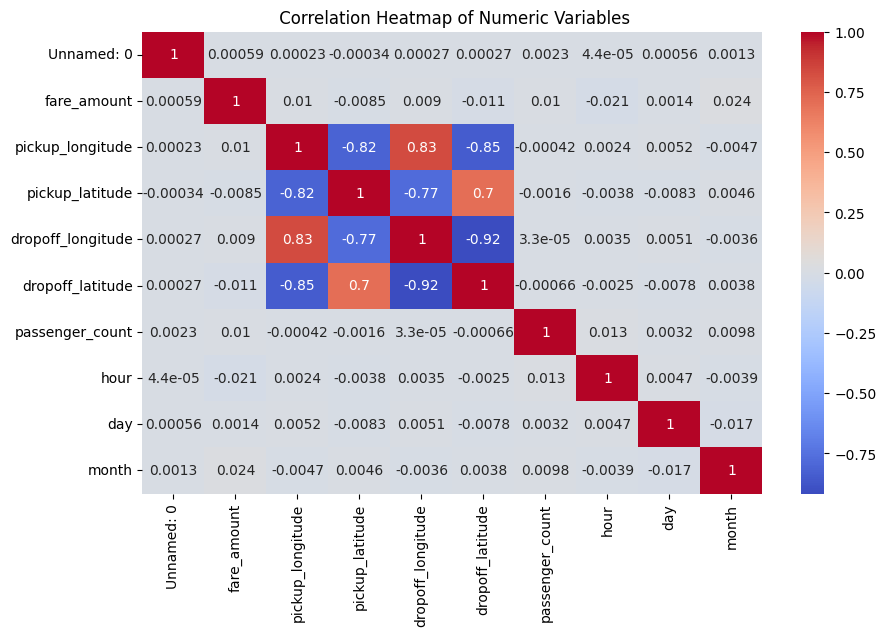

In [31]:
# ✅ Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title(" Correlation Heatmap of Numeric Variables")
plt.show()


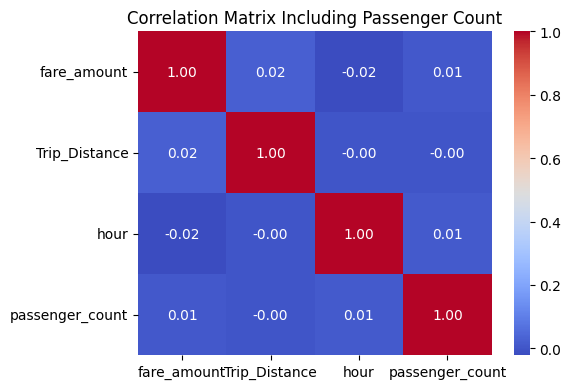

In [33]:
# Include passenger_count if it exists
if 'passenger_count' in df.columns:
    corr_data_full = df[['fare_amount', 'Trip_Distance', 'hour', 'passenger_count']]
    corr_matrix_full = corr_data_full.corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix_full, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Including Passenger Count')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'passenger_count' not found in dataset.")


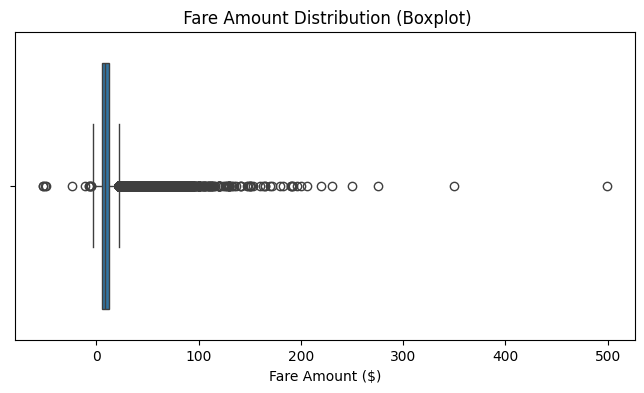

In [19]:
# ✅ Boxplot for Fare Amount
plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title(" Fare Amount Distribution (Boxplot)")
plt.xlabel("Fare Amount ($)")
plt.show()


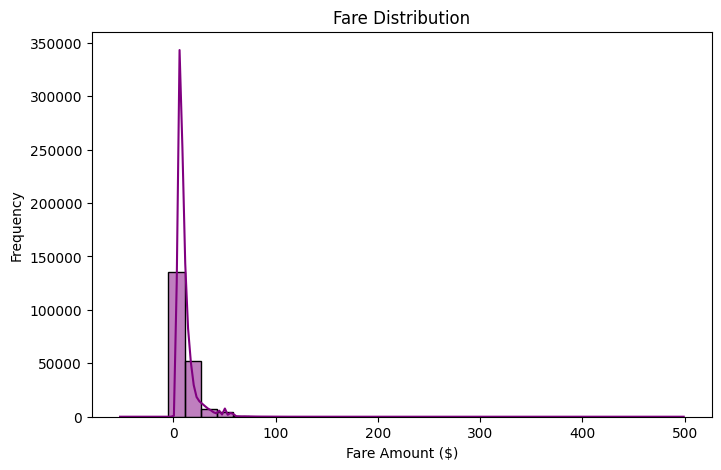

In [20]:
# ✅ Histogram of Fare Amounts
plt.figure(figsize=(8, 5))
sns.histplot(df['fare_amount'], bins=35, kde=True, color='purple')
plt.title("Fare Distribution")
plt.xlabel("Fare Amount ($)")
plt.ylabel("Frequency")
plt.show()


In [21]:
print(df.columns)


Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'hour', 'day', 'month',
       'day_of_week', 'is_peak'],
      dtype='object')


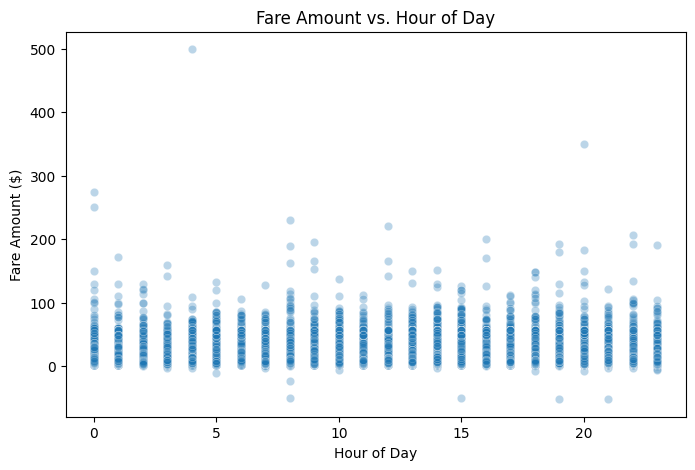

In [22]:
# ✅ Scatter Plot: Fare vs Hour
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='hour', y='fare_amount', alpha=0.3)
plt.title("Fare Amount vs. Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Fare Amount ($)")
plt.show()


In [23]:
# ✅ IQR method
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Outlier condition
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]

print("Total outliers in fare_amount:", len(outliers))


Total outliers in fare_amount: 17166


In [24]:
from math import radians, sin, cos, sqrt, atan2

# Function to calculate distance (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1)*cos(lat2)*sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    return R * c

# Apply it row-wise
df['Trip_Distance'] = df.apply(
    lambda row: haversine(
        row['pickup_latitude'],
        row['pickup_longitude'],
        row['dropoff_latitude'],
        row['dropoff_longitude']
    ), axis=1
)

# ✅ Export updated CSV
df.to_csv("uber_cleaned.csv", index=False)


In [26]:
df.to_csv(r"C:\Users\HP\OneDrive\Desktop\Intro to big data assignment\uber-fares-dataset\uber_cleaned.csv", index=False)


In [27]:
# Summary stats for key numerical columns
df[['fare_amount', 'Trip_Distance']].describe()


,fare_amount,Trip_Distance
count,199999.000000,199999.000000
mean,11.359892,20.855350
std,9.901760,382.964642
min,-52.000000,0.000000
25%,6.000000,1.215222
50%,8.500000,2.120992
75%,12.500000,3.875169
max,499.000000,16409.239135


In [28]:
# Fare outlier detection
Q1 = df['fare_amount'].quantile(0.25)
Q3 = df['fare_amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Fare IQR:", IQR)
print("Outliers below:", lower_bound, " | above:", upper_bound)

# Filter outliers
outliers = df[(df['fare_amount'] < lower_bound) | (df['fare_amount'] > upper_bound)]
print("Number of outliers:", len(outliers))


Fare IQR: 6.5
Outliers below: -3.75  | above: 22.25
Number of outliers: 17166


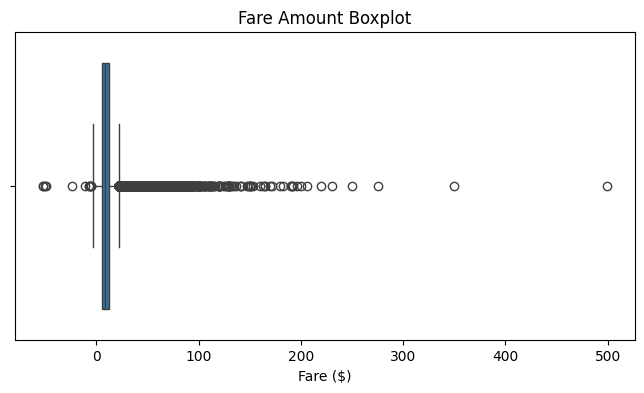

In [29]:


plt.figure(figsize=(8, 4))
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Boxplot')
plt.xlabel('Fare ($)')
plt.show()
